## Vertical overturning with diapycnal component

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
from netCDF4 import MFDataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap, shiftgrid # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

import xarray
from xarray.ufuncs import square, sqrt

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Extract the grid variables
file1 ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
file2 ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'


In [10]:

# Extract the variables
nc = Dataset(file1, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
#beta = nc.variables['beta'][:]
#f_coriolis=nc.variables['f_coriolis'][:]
#potrho = nc.variables['potrho'][:]
#ssh = nc.variables[variable][:]
#mld = nc.variables['mld'][:]
#ty_trans_rho = nc.variables['ty_trans_rho'][0,:,:,:]
nc.close() # close the file
print geolon_t.shape


print 'dxt ', dxt[500,100:110]
print 'dyt ', dyt[500,100:110]


nc = Dataset(file2, mode='r') # file handle, open in read only mode
u = nc.variables['u'][:]
v = nc.variables['v'][:]
wt = nc.variables['wt'][:]
rho = nc.variables['pot_rho_0'][:]
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
nc.close() # close the file
print wt.shape
print sw_ocean[35]


(1080, 1440)
dxt  [27797.078125 27797.078125 27797.078125 27797.078125 27797.078125
 27797.078125 27797.078125 27797.078125 27797.078125 27797.078125]
dyt  [27797.078125 27797.078125 27797.078125 27797.078125 27797.078125
 27797.078125 27797.078125 27797.078125 27797.078125 27797.078125]
(1, 50, 1080, 1440)
2576.40014648


In [11]:
#difference between a second order gradient and a difference
#the gradient averages the differnce between the 3 values: x-1,x,x+1
dzt2=np.gradient(st_ocean)
print 'dzt2', dzt2

dzt=np.zeros(len(st_ocean))
print dzt.shape

dzt[0:len(st_ocean)-1]=np.diff(st_ocean)
dzt[len(st_ocean)-1]=dzt[len(st_ocean)-2]

dzt=dzt[:, np.newaxis]

print dzt.shape
print 'dzt', dzt

dzt2 [  10.06710005   10.09290051   10.128901     10.17850018   10.24739838
   10.34269905   10.47480011   10.6576004    10.91020203   11.25960159
   11.74169922   12.40620041   13.31999588   14.57260132   16.28290558
   18.604599     21.73239899   25.90259552   31.38679504   38.46980286
   47.40710449   58.35929871   71.3086853    85.98838806  101.85482788
  118.14520264  134.01159668  148.69128418  161.64071655  172.59289551
  181.53027344  188.61315918  194.09735107  198.26751709  201.39550781
  203.71691895  205.42749023  206.68005371  207.59399414  208.25793457
  208.74060059  209.08984375  209.34216309  209.5255127   209.65722656
  209.75244141  209.82177734  209.87109375  209.90673828  209.91210938]
(50,)
(50, 1)
dzt [[  10.06710005]
 [  10.11870098]
 [  10.13910103]
 [  10.21789932]
 [  10.27689743]
 [  10.40850067]
 [  10.54109955]
 [  10.77410126]
 [  11.0463028 ]
 [  11.47290039]
 [  12.01049805]
 [  12.80190277]
 [  13.83808899]
 [  15.30711365]
 [  17.25869751]
 [  19.9505

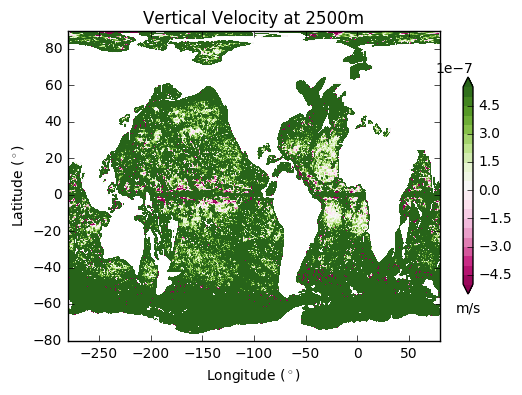

In [12]:
clev = np.arange(-.0000005,.00000055,5E-8)
#clev = np.arange(-50E-7,50E-7,5E-7)
#print clev
#plt.figure(figsize=(10,10))
plt.contourf(geolon_t,geolat_t,wt[0,35,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev = np.arange(-2,1,0.2)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('Vertical Velocity at 2500m')

#plt.savefig('/Users/johnspence/Documents/ccrcproc/VertOverturn/wt_2500.pdf')

plt.show()

##note the colors don't show up very well ... especially the negative ones


## Vertical Mass Exchange Globally 


<function matplotlib.pyplot.show>

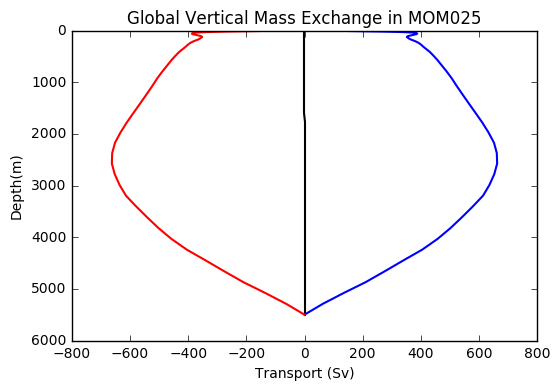

In [13]:
#global sum of wt*area at each depth level
gsumk=np.zeros(wt.shape[1])
gnsumk=np.zeros(wt.shape[1])
gpsumk=np.zeros(wt.shape[1])

#net exchange
gsumk=np.sum(np.sum(wt*area_t,axis=2),axis=2)

#positive values
wt2=wt.copy()
wt2[wt2 < 0] = 0
gpsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)

#negative values
wt2=wt.copy()
wt2[wt2 > 0] = 0
gnsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)

wt2=None

plt.plot(gsumk[0,:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(gpsumk[0,:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(gnsumk[0,:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
#plt.xlim([-75,85])
plt.title('Global Vertical Mass Exchange in MOM025')
plt.show

print gsumk[0,:]

## Vertical Mass Exchange Between 45S-45N

[296] [700] [-44.9123301] [ 45.08910354]


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


<function matplotlib.pyplot.show>

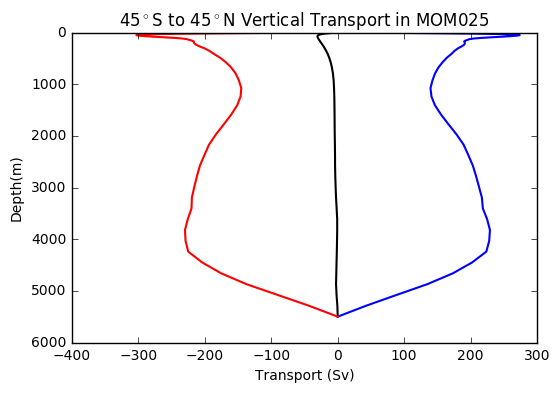

In [14]:
tmp1=np.argwhere(yt_ocean>-45)# and lat<-45)
tmp2=np.argwhere(yt_ocean>45)# and lat<-45)
print tmp1[0], tmp2[0], yt_ocean[tmp1[0]], yt_ocean[tmp2[0]]

wta=wt[0,:,tmp1[0]:tmp2[0],:]*area_t[tmp1[0]:tmp2[0],:]

#global sum
eqsumk=np.sum(np.sum(wta,axis=2),axis=1)

#positive values
wta2=wta.copy()
wta2[wta2 < 0] = 0
eqpsumk=np.sum(np.sum(wta2,axis=2),axis=1)

#negative values
wta2=wta.copy()
wta2[wta2 > 0] = 0
eqnsumk=np.sum(np.sum(wta2,axis=2),axis=1)

wta2=None

#looks good compared to matlab version!!!!
plt.plot(eqsumk[:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(eqpsumk[:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(eqnsumk[:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
#plt.xlim([-75,85])
plt.title('45$^\circ$S to 45$^\circ$N Vertical Transport in MOM025')
plt.show


## vertical velocity diapycnal component

w* = w +  (u drho/dx + v drho/dy)/(drho/dz)

In [35]:
#calc drho in vertical - this goes from top to bottom - take negative
#use gradients not differences ... then test with differences

print rho.shape

print dzt.shape

print dzt.T.shape
print rho[0,:,:,:].T.shape

drhodz=-np.gradient(rho[0,:,:,:].T,dzt.T,axis=2)
drhodz=drhodz.T
print drhodz.shape
print 'drhodz ', drhodz[:,500,100], rho[0,:,500,100], dzt[:]
print 'rho shape ', rho.shape, rho[0,:,:,:].shape

drhody=np.gradient(rho[0,:,:,:],dyt,axis=1)
print drhody.shape

drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
print drhodx.shape



#calc drho/dz
#drhodz=drho[0,:,:,:].T/dzt[:, np.newaxis].T
#drhodz=drhodz.T
#print drhodz.shape

drho=rho.copy()
drho[:,0:rho.shape[1]-1,:,:]=np.ma.diff(rho,axis=1)
drho[:,rho.shape[1]-1,:,:]=drho[:,rho.shape[1]-2,:,:]
print drho.shape

#drho=np.zeros(rho.shape)
#drho[:,0:rho.shape[1]-1,:,:]=np.ma.diff(rho,axis=1)
#drho[:,rho.shape[1]-1,:,:]=drho[:,rho.shape[1]-2,:,:]
#print drho.shape

#drhodz=drho.T/dzt[:, np.newaxis].T
#drhodz=drhodz.T

print 'rho drho dz drhodz_diff drhodz_grad',  rho[0,:,500,100], drho[0,:,500,100],dzt[:], drho[0,:,500,100]/dzt[:],drhodz[:,500,100] 



(1, 50, 1080, 1440)
(50, 1)
(1, 50)
(1440, 1080, 50)
(50, 1080, 1440)
drhodz  [-0.003668014658614993 -0.0036040698178112507 -0.0027751184534281492 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --] [1020.8311767578125 1020.8681030273438 1020.9041137695312
 1020.9243774414062 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- --] [[  10.06710005]
 [  10.11870098]
 [  10.13910103]
 [  10.21789932]
 [  10.27689743]
 [  10.40850067]
 [  10.54109955]
 [  10.77410126]
 [  11.0463028 ]
 [  11.47290039]
 [  12.01049805]
 [  12.80190277]
 [  13.83808899]
 [  15.30711365]
 [  17.25869751]
 [  19.95050049]
 [  23.51429749]
 [  28.29089355]
 [  34.48269653]
 [  42.45690918]
 [  52.3572998 ]
 [  64.36129761]
 [  78.256073  ]
 [  93.72070312]
 [ 109.98895264]
 [ 126.30145264]
 [ 141.72174072]
 [ 155.66082764]
 [ 167.6206054

In [36]:
#VALIDATE DIFFERENCE FROM BOTTOM TO TOP IS SAME AS -(TOP TO BOTTOM)

#testrho=rho[0,:,500,500]
#print testrho

#dtrho=np.gradient(testrho[::-1])
#print 'dtrho', dtrho

#dtrho2=np.gradient(testrho)
#print 'dtrho2', dtrho2

#Alternative validation
#calc drho from bottom up - same as neg (top to bottom)
#calc drho in vertical

#print rho.shape
#drho2=np.gradient(rho[:,::-1,:,:],axis=1)
#print drho2.shape
#drho2=drho2[:,::-1,:,:]
##print 'drho ', drho2[0,:,500,100], rho[0,:,500,100]

#calc drho/dz
#drhodz2=drho2[0,:,:,:].T/dzt[:, np.newaxis].T
#drhodz2=drhodz2.T
#print drhodz2.shape

#print 'drho rho dz drhodz2', drho2[0,:,500,100], rho[0,:,500,100], dzt[:], drhodz2[:,500,100] 


In [37]:
#print rho.shape

#drhox=np.diff(rho,axis=3)
#drhoy=np.diff(rho,axis=2)

#drhox2=np.gradient(rho,axis=3)
#drhoy2=np.gradient(rho,axis=2)


#calc drho/dx drho/dy
#drhodx=np.gradient(rho,axis=3)/dxt
#drhody=np.gradient(rho,axis=2)/dyt
#print drhodx.shape
#print dxt.shape

#print dxt[500,100:102]
#print dyt[500,100:102]

#print 'drho rho dx drhodx', rho[0,0,500,100:102], dxt[500,100:102], drhodx[0,0,500,100:102]
#print 'drho rho dy drhody', rho[0,0,500:502,100], dyt[500:502,100], drhody[0,0,500:502,100] 


In [38]:
#difference between a second order gradient and a difference
#the gradient averages the differnce between the 3 vales: x-1,x,x+1

#print drhox.shape

#print 'rho ', rho[0,0,500,99:103], rho[0,0,500,100]-rho[0,0,500,99], rho[0,0,500,101]-rho[0,0,500,100], rho[0,0,500,102]-rho[0,0,500,101]

#print 'drhox_diff ', drhox[0,0,500,99:102]

#print 'drhox_grad ', drhox2[0,0,500,99:102]

#print (drhox[0,0,500,99]+drhox[0,0,500,100])/2

In [39]:
#calc diapycnal vertical vel
wt_dia = wt + (u*drhodx + v*drhody)/drhodz
print wt_dia.shape


(1, 50, 1080, 1440)


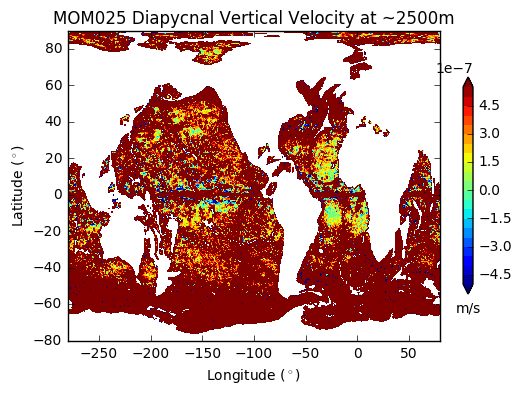

In [40]:
#plt.figure(figsize=(20,10))
#clev = np.arange(-.0001,.00012,0.00002)
#clev = np.arange(-.0000005,.00000055,5E-8)
#clev = np.arange(-50E-7,50E-7,5E-7)
clev = np.arange(-.0000005,.00000055,5E-8)
plt.contourf(geolon_t,geolat_t,wt_dia[0,35,:,:],clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev = np.arange(-2,1,0.2)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.contour(geolon_t,geolat_t,ssh[0],levels=[0.0,],colors='k',linewidths=0.5)

plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([-80,90])
plt.xlim([-280,80])
plt.title('MOM025 Diapycnal Vertical Velocity at ~2500m')

#plt.savefig('/Users/johnspence/Documents/ccrcproc/VertOverturn/mo025_wt_dia_2500.pdf')

plt.show()

(1, 50, 1080, 1440)
[[-0.00016825000056996942 -0.0001564999984111637 -0.00014449999434873462
  -0.0001289999927394092 -0.00013000000035390258 -0.00012399999832268804
  -0.00012199999764561653 -0.00011899999663000926 -0.00011449999874457717
  -0.00010849999671336263 -0.00011000000085914508 -0.00010574999760137871
  -0.00010574999760137871 -0.0001005000012810342 -9.337499795947224e-05
  -9.137499728240073e-05 -9.14999982342124e-05 -8.98750004125759e-05
  -8.125000022118911e-05 -7.875000301282853e-05 -7.249999907799065e-05
  -7.012500282144174e-05 -6.968749949010089e-05 -6.08750015089754e-05
  -5.887500083190389e-05 -4.8000001697801054e-05 -4.5500000851461664e-05
  -4.1250001231674105e-05 -1.8999999156221747e-05 -5.249999958323315e-06
  -1.049999991664663e-05 2.750000021478627e-06 4.500000159168849e-06
  2.049999966402538e-05 2.5749999622348696e-05 2.1249999917927198e-05
  2.2250000256462954e-05 2.5499999537714757e-05 1.8250000721309334e-05
  2.0249999579391442e-05 1.700000029813964e-05 1

<function matplotlib.pyplot.show>

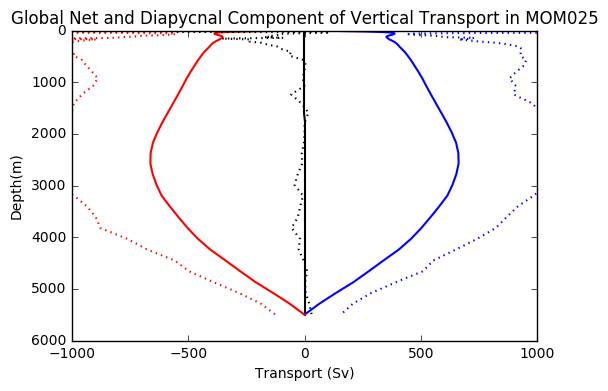

In [41]:
print wt_dia.shape

gdsumk=np.sum(np.sum(wt_dia*area_t,axis=2),axis=2)
#print gsumk[:]
print gsumk[:]/1E6

wt2=wt_dia.copy()
wt2[wt2 < 0] = 0
print 'pos ', wt2.shape
gdpsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)
print 'gp', gdpsumk.shape
print gdpsumk[:]/1E6

wt2=wt_dia.copy()
wt2[wt2 > 0] = 0
print 'neg ', wt2.shape
gdnsumk=np.sum(np.sum(wt2*area_t,axis=2),axis=2)
print 'gn', gdnsumk.shape
print gdnsumk[:]/1E6

wt2=None

#gpsumk=np.sum(np.sum(where(tmp>0),axis=2),axis=2)
##print gpsumk[:]
#print 'gp', gpsumk.shape
#print gpsumk[:]/1E6


plt.plot(gsumk[0,:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(gpsumk[0,:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(gnsumk[0,:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')

plt.plot(gdsumk[0,:]/1E6,sw_ocean,linestyle=':',color='k',linewidth=1.5,label='masked')
plt.plot(gdpsumk[0,:]/1E6,sw_ocean,linestyle=':',color='b',linewidth=1.5,label='masked')
plt.plot(gdnsumk[0,:]/1E6,sw_ocean,linestyle=':',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
plt.xlim([-1000,1000])
plt.title('Global Net and Diapycnal Component of Vertical Transport in MOM025')
plt.show




In [42]:
print gsumk.shape

(1, 50)


## Plot W_Dia transport between 45N-45S

[296] [700] [-44.9123301] [ 45.08910354]
(50, 404, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


eq dia (50,)
[30595.91015625 11207.6787109375 2106.618896484375 788.9077758789062
 405.6015319824219 284.8221130371094 256.9130859375 258.16461181640625
 271.8401794433594 292.5180358886719 281.3299255371094 282.09326171875
 368.00384521484375 313.9270935058594 234.50990295410156 231.2387237548828
 229.00633239746094 228.75379943847656 226.56626892089844
 221.04342651367188 211.90939331054688 199.29544067382812 185.9330596923828
 160.7951202392578 145.7328643798828 129.94833374023438 119.77665710449219
 116.13488006591797 119.09619140625 123.01740264892578 129.0669403076172
 141.5015411376953 168.30624389648438 163.02359008789062 169.4189910888672
 177.66744995117188 189.21888732910156 202.7137908935547 210.9744415283203
 238.94400024414062 270.4499206542969 320.076416015625 348.07122802734375
 352.4123229980469 337.4033203125 349.75335693359375 271.01971435546875
 197.44178771972656 164.5193328857422 137.55795288085938]
neg  (50, 404, 1440)
eq (50,)
[-36188.8359375 -17995.8203125 -280

<function matplotlib.pyplot.show>

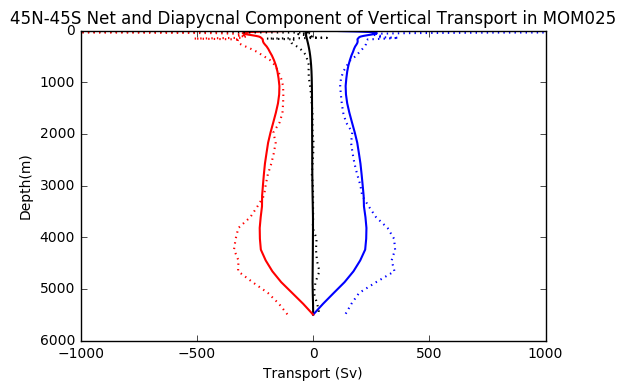

In [43]:
tmp1=np.argwhere(yt_ocean>-45)# and lat<-45)
tmp2=np.argwhere(yt_ocean>45)# and lat<-45)
print tmp1[0], tmp2[0], yt_ocean[tmp1[0]], yt_ocean[tmp2[0]]

wta=wt_dia[0,:,tmp1[0]:tmp2[0],:]*area_t[tmp1[0]:tmp2[0],:]
print wta.shape

eqdsumk=np.sum(np.sum(wta,axis=2),axis=1)

wta2=wta.copy()
wta2[wta2 < 0] = 0
#print 'pos ', wt2.shape
eqdpsumk=np.sum(np.sum(wta2,axis=2),axis=1)
print 'eq dia', eqdpsumk.shape
print eqdpsumk[:]/1E6

wta2=wta.copy()
wta2[wta2 > 0] = 0
print 'neg ', wta2.shape
eqdnsumk=np.sum(np.sum(wta2,axis=2),axis=1)
print 'eq', eqdnsumk.shape
print eqdnsumk[:]/1E6

wta2=None

#looks good compared to matlab version!!!!
plt.plot(eqsumk[:]/1E6,sw_ocean,linestyle='-',color='k',linewidth=1.5,label='masked')
plt.plot(eqpsumk[:]/1E6,sw_ocean,linestyle='-',color='b',linewidth=1.5,label='masked')
plt.plot(eqnsumk[:]/1E6,sw_ocean,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.plot(eqdsumk[:]/1E6,sw_ocean,linestyle=':',color='k',linewidth=1.5,label='masked')
plt.plot(eqdpsumk[:]/1E6,sw_ocean,linestyle=':',color='b',linewidth=1.5,label='masked')
plt.plot(eqdnsumk[:]/1E6,sw_ocean,linestyle=':',color='r',linewidth=1.5,label='masked')
plt.gca().invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('Transport (Sv)')
plt.xlim([-1000,1000])
plt.title('45N-45S Net and Diapycnal Component of Vertical Transport in MOM025')
plt.show
